In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
import time

In [2]:
#生成模拟数据， 假设真实函数为 y = x^3 + 2 * x^2 - 3 * x + 4
x_data = np.sort( np.random.uniform(low=-1, high=1, size=100) )

In [3]:
#创建函数 计算y值
def func(x):
    return pow(x,3) + 2*pow(x,2) - 3*x + 4
y_data_func = func(x_data)

In [4]:
#加入噪声， 让y值在一个小的区域内波动
y_data = y_data_func + np.random.normal(scale=0.2, size=len(y_data_func))

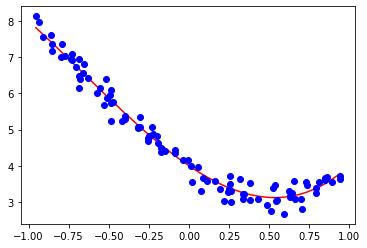

In [5]:
#绘制数据
plt.plot(x_data, y_data_func, color='r')
plt.plot(x_data, y_data, 'ob')

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation='selu', input_shape=(1,), name='my_dense'))
model.add(keras.layers.Dense(8, activation='softplus'))
model.add(keras.layers.Dense(1, activation='selu'))
   
class MyMetrics(keras.metrics.Metric):
    def __init__(self):
        super().__init__()
        self.total = tf.Variable(0, dtype=tf.int32)
        self.count = tf.Variable(0, dtype=tf.int32)
        
    def update_state(self,y_true,y_pred,sample_weight=None):
        threshold = tf.constant(0.5, dtype=tf.float32)
        num = tf.shape( tf.where(tf.abs(tf.cast(y_true,tf.float32)-y_pred) < 0.5) )[0]
        self.total.assign_add( tf.shape(y_true)[0] )
        self.count.assign_add( num )
        
    def result(self):
        return self.count / self.total
    
    def reset_states(self):
        self.total.assign(0)
        self.count.assign(0)
    
model.compile(optimizer="sgd",
              loss="mse",
              metrics=[MyMetrics()])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_dense (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [17]:
indexs = np.random.choice(100, 100, replace=False)
x_input = x_data[indexs]
y_input = y_data[indexs]

In [18]:
history = model.fit(x_input, y_input, validation_split=0.1, epochs=500)

Train on 90 samples, validate on 10 samples
Epoch 1/500
90/90 [==============================] - 1s 9ms/sample - loss: 15.9924 - Accuracy: 0.0000e+00 - val_loss: 12.1689 - val_Accuracy: 0.0000e+00
Epoch 2/500
90/90 [==============================] - 0s 311us/sample - loss: 8.2133 - Accuracy: 0.0000e+00 - val_loss: 6.3912 - val_Accuracy: 0.0000e+00
Epoch 3/500
90/90 [==============================] - 0s 303us/sample - loss: 4.5067 - Accuracy: 0.0000e+00 - val_loss: 3.4629 - val_Accuracy: 0.0000e+00
Epoch 4/500
90/90 [==============================] - 0s 361us/sample - loss: 2.7474 - Accuracy: 0.0000e+00 - val_loss: 1.9650 - val_Accuracy: 0.0000e+00
Epoch 5/500
90/90 [==============================] - 0s 327us/sample - loss: 1.8571 - Accuracy: 0.0000e+00 - val_loss: 1.2227 - val_Accuracy: 0.0000e+00
Epoch 6/500
90/90 [==============================] - 0s 339us/sample - loss: 1.3341 - Accuracy: 0.0000e+00 - val_loss: 0.8574 - val_Accuracy: 0.0000e+00
Epoch 7/500
90/90 [===================

Epoch 54/500
90/90 [==============================] - 0s 377us/sample - loss: 0.1407 - Accuracy: 0.0000e+00 - val_loss: 0.0915 - val_Accuracy: 0.0000e+00
Epoch 55/500
90/90 [==============================] - 0s 450us/sample - loss: 0.1384 - Accuracy: 0.0000e+00 - val_loss: 0.0907 - val_Accuracy: 0.0000e+00
Epoch 56/500
90/90 [==============================] - 0s 355us/sample - loss: 0.1359 - Accuracy: 0.0000e+00 - val_loss: 0.0874 - val_Accuracy: 0.0000e+00
Epoch 57/500
90/90 [==============================] - 0s 400us/sample - loss: 0.1340 - Accuracy: 0.0000e+00 - val_loss: 0.0870 - val_Accuracy: 0.0000e+00
Epoch 58/500
90/90 [==============================] - 0s 427us/sample - loss: 0.1319 - Accuracy: 0.0000e+00 - val_loss: 0.0853 - val_Accuracy: 0.0000e+00
Epoch 59/500
90/90 [==============================] - 0s 527us/sample - loss: 0.1290 - Accuracy: 0.0000e+00 - val_loss: 0.0844 - val_Accuracy: 0.0000e+00
Epoch 60/500
90/90 [==============================] - 0s 450us/sample - loss

Epoch 160/500
90/90 [==============================] - 0s 405us/sample - loss: 0.0568 - Accuracy: 0.0000e+00 - val_loss: 0.0347 - val_Accuracy: 0.0000e+00
Epoch 161/500
90/90 [==============================] - 0s 361us/sample - loss: 0.0568 - Accuracy: 0.0000e+00 - val_loss: 0.0346 - val_Accuracy: 0.0000e+00
Epoch 162/500
90/90 [==============================] - 0s 461us/sample - loss: 0.0569 - Accuracy: 0.0000e+00 - val_loss: 0.0356 - val_Accuracy: 0.0000e+00
Epoch 163/500
90/90 [==============================] - 0s 394us/sample - loss: 0.0571 - Accuracy: 0.0000e+00 - val_loss: 0.0344 - val_Accuracy: 0.0000e+00
Epoch 164/500
90/90 [==============================] - 0s 366us/sample - loss: 0.0566 - Accuracy: 0.0000e+00 - val_loss: 0.0346 - val_Accuracy: 0.0000e+00
Epoch 165/500
90/90 [==============================] - 0s 427us/sample - loss: 0.0564 - Accuracy: 0.0000e+00 - val_loss: 0.0347 - val_Accuracy: 0.0000e+00
Epoch 166/500
90/90 [==============================] - ETA: 0s - loss:

Epoch 265/500
90/90 [==============================] - 0s 327us/sample - loss: 0.0547 - Accuracy: 0.0000e+00 - val_loss: 0.0347 - val_Accuracy: 0.0000e+00
Epoch 266/500
90/90 [==============================] - 0s 350us/sample - loss: 0.0548 - Accuracy: 0.0000e+00 - val_loss: 0.0347 - val_Accuracy: 0.0000e+00
Epoch 267/500
90/90 [==============================] - 0s 339us/sample - loss: 0.0544 - Accuracy: 0.0000e+00 - val_loss: 0.0350 - val_Accuracy: 0.0000e+00
Epoch 268/500
90/90 [==============================] - 0s 350us/sample - loss: 0.0546 - Accuracy: 0.0000e+00 - val_loss: 0.0353 - val_Accuracy: 0.0000e+00
Epoch 269/500
90/90 [==============================] - 0s 333us/sample - loss: 0.0544 - Accuracy: 0.0000e+00 - val_loss: 0.0352 - val_Accuracy: 0.0000e+00
Epoch 270/500
90/90 [==============================] - 0s 361us/sample - loss: 0.0548 - Accuracy: 0.0000e+00 - val_loss: 0.0345 - val_Accuracy: 0.0000e+00
Epoch 271/500
90/90 [==============================] - 0s 394us/sample

Epoch 318/500
90/90 [==============================] - 0s 344us/sample - loss: 0.0541 - Accuracy: 0.0000e+00 - val_loss: 0.0355 - val_Accuracy: 0.0000e+00
Epoch 319/500
90/90 [==============================] - 0s 327us/sample - loss: 0.0541 - Accuracy: 0.0000e+00 - val_loss: 0.0351 - val_Accuracy: 0.0000e+00
Epoch 320/500
90/90 [==============================] - 0s 416us/sample - loss: 0.0549 - Accuracy: 0.0000e+00 - val_loss: 0.0365 - val_Accuracy: 0.0000e+00
Epoch 321/500
90/90 [==============================] - 0s 316us/sample - loss: 0.0539 - Accuracy: 0.0000e+00 - val_loss: 0.0362 - val_Accuracy: 0.0000e+00
Epoch 322/500
90/90 [==============================] - 0s 322us/sample - loss: 0.0537 - Accuracy: 0.0000e+00 - val_loss: 0.0347 - val_Accuracy: 0.0000e+00
Epoch 323/500
90/90 [==============================] - 0s 311us/sample - loss: 0.0544 - Accuracy: 0.0000e+00 - val_loss: 0.0333 - val_Accuracy: 0.0000e+00
Epoch 324/500
90/90 [==============================] - 0s 383us/sample

Epoch 371/500
90/90 [==============================] - 0s 327us/sample - loss: 0.0534 - Accuracy: 0.0000e+00 - val_loss: 0.0341 - val_Accuracy: 0.0000e+00
Epoch 372/500
90/90 [==============================] - 0s 372us/sample - loss: 0.0530 - Accuracy: 0.0000e+00 - val_loss: 0.0345 - val_Accuracy: 0.0000e+00
Epoch 373/500
90/90 [==============================] - 0s 339us/sample - loss: 0.0531 - Accuracy: 0.0000e+00 - val_loss: 0.0336 - val_Accuracy: 0.0000e+00
Epoch 374/500
90/90 [==============================] - 0s 322us/sample - loss: 0.0532 - Accuracy: 0.0000e+00 - val_loss: 0.0348 - val_Accuracy: 0.0000e+00
Epoch 375/500
90/90 [==============================] - 0s 377us/sample - loss: 0.0539 - Accuracy: 0.0000e+00 - val_loss: 0.0354 - val_Accuracy: 0.0000e+00
Epoch 376/500
90/90 [==============================] - 0s 311us/sample - loss: 0.0540 - Accuracy: 0.0000e+00 - val_loss: 0.0363 - val_Accuracy: 0.0000e+00
Epoch 377/500
90/90 [==============================] - 0s 350us/sample

Epoch 424/500
90/90 [==============================] - 0s 333us/sample - loss: 0.0528 - Accuracy: 0.0000e+00 - val_loss: 0.0351 - val_Accuracy: 0.0000e+00
Epoch 425/500
90/90 [==============================] - 0s 300us/sample - loss: 0.0534 - Accuracy: 0.0000e+00 - val_loss: 0.0351 - val_Accuracy: 0.0000e+00
Epoch 426/500
90/90 [==============================] - 0s 316us/sample - loss: 0.0531 - Accuracy: 0.0000e+00 - val_loss: 0.0352 - val_Accuracy: 0.0000e+00
Epoch 427/500
90/90 [==============================] - 0s 289us/sample - loss: 0.0531 - Accuracy: 0.0000e+00 - val_loss: 0.0333 - val_Accuracy: 0.0000e+00
Epoch 428/500
90/90 [==============================] - 0s 294us/sample - loss: 0.0526 - Accuracy: 0.0000e+00 - val_loss: 0.0345 - val_Accuracy: 0.0000e+00
Epoch 429/500
90/90 [==============================] - 0s 316us/sample - loss: 0.0525 - Accuracy: 0.0000e+00 - val_loss: 0.0334 - val_Accuracy: 0.0000e+00
Epoch 430/500
90/90 [==============================] - 0s 316us/sample

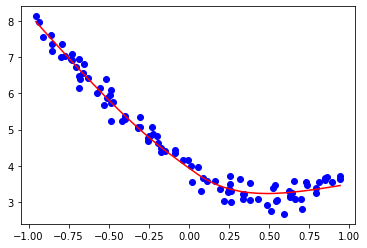

In [19]:
#绘制训练结果
plt.plot(x_data, y_data, 'ob')
y_pred = model.predict(x_data)
plt.plot(x_data, y_pred, color='r')